In [1]:
rm(list=ls())
library(ggplot2)
library(dplyr)
library(lubridate)
library(reshape2)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
phone_steps=read.table("parsed_HealthKitData.Steps.Phone.txt",header=TRUE,sep='\t')
phone_steps$Date=as.Date(phone_steps$Date)
length(unique(phone_steps$Subject))

[1] 1325

In [4]:
phone_distance=read.table("parsed_HealthKitData.Distance.Phone.txt",header=TRUE,sep='\t')
phone_distance$Date=as.Date(phone_distance$Date)
length(unique(phone_distance$Subject))

[1] 1318

In [5]:
phone_steps_2019=phone_steps[(phone_steps$Date>=as.Date('2019-01-01')) & (phone_steps$Date<as.Date('2019-07-01')),]
phone_steps_2020=phone_steps[(phone_steps$Date>=as.Date('2020-01-01')) & (phone_steps$Date<as.Date('2020-07-01')),]
print(length(unique(phone_steps_2020$Subject)))
print(length(unique(phone_steps_2019$Subject)))
print(length(unique(phone_steps_2020$Subject)))






[1] 1063
[1] 234
[1] 1063


In [6]:
phone_distance_2019=phone_distance[(phone_distance$Date>=as.Date('2019-01-01')) & (phone_distance$Date<as.Date('2019-07-01')),]
phone_distance_2020=phone_distance[(phone_distance$Date>=as.Date('2020-01-01')) & (phone_distance$Date<as.Date('2020-07-01')),]
print(length(unique(phone_distance_2019$Subject)))
print(length(unique(phone_distance_2020$Subject)))



[1] 240
[1] 1052


Using Date as id variables



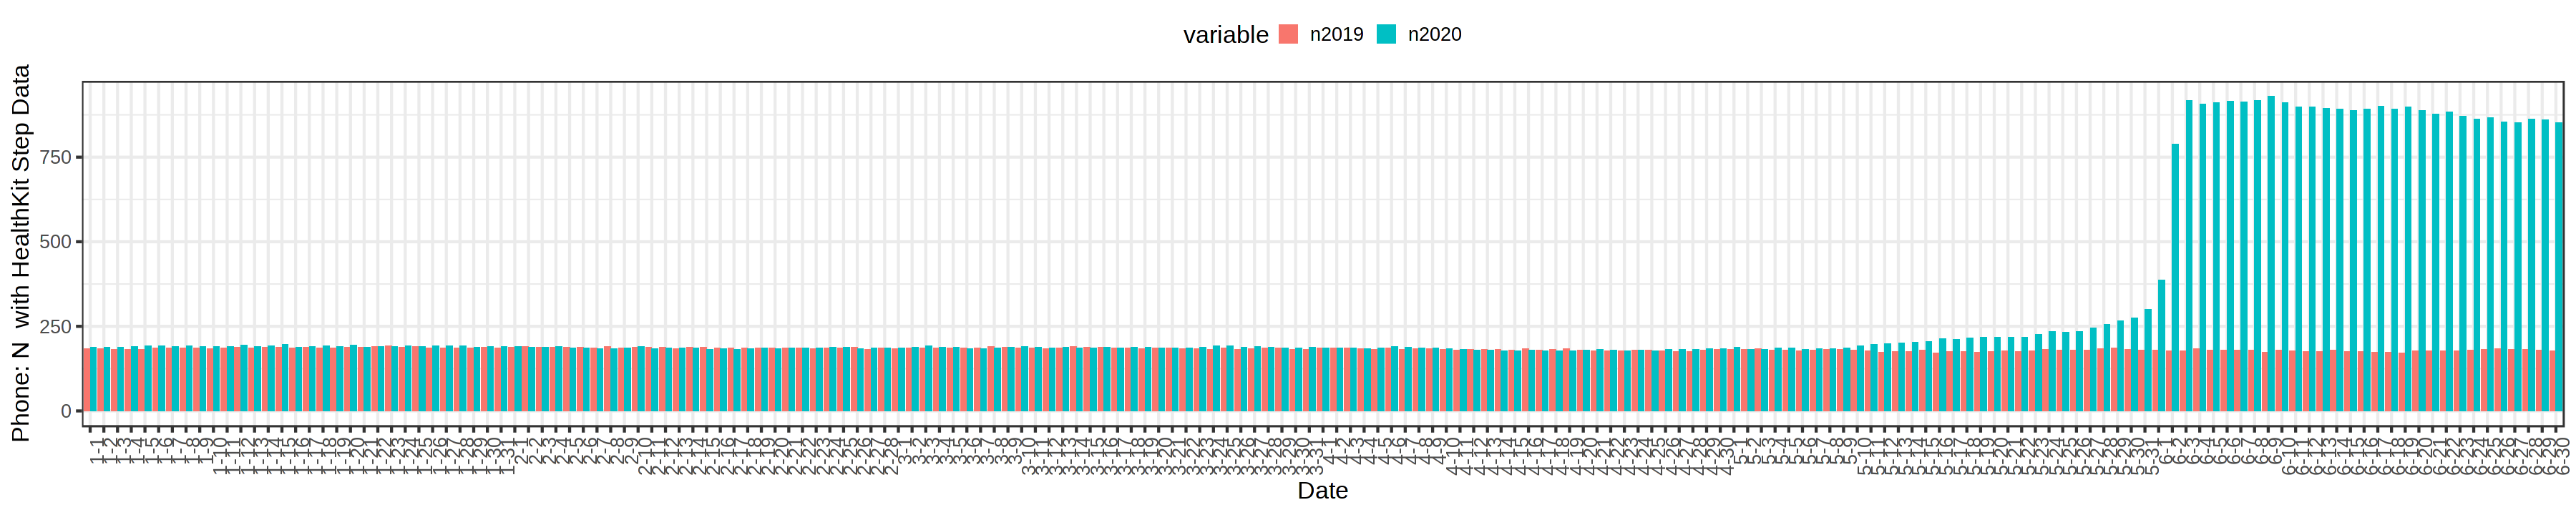

In [7]:
phone_subjects_steps_2019=phone_steps_2019 %>% group_by(Date) %>% summarize(n=n())
phone_subjects_steps_2020=phone_steps_2020 %>% group_by(Date) %>% summarize(n=n())
phone_subjects_steps_2020$Date=phone_subjects_steps_2020$Date-years(1)
phone_nmerged=merge(phone_subjects_steps_2019,phone_subjects_steps_2020,by='Date')
phone_nmerged$month=month(phone_nmerged$Date)
phone_nmerged$day=day(phone_nmerged$Date)

phone_nmerged$Date <- do.call(paste, c(phone_nmerged[c("month","day")], sep="-"))
colnames(phone_nmerged)=c("Date","n2019","n2020","month","day")
phone_nmerged$Date=factor(phone_nmerged$Date,levels=phone_nmerged$Date)
phone_nmerged$month=NULL
phone_nmerged$day=NULL


phone_nmelted=melt(phone_nmerged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(phone_nmelted,aes(x=Date,y=value,group=variable,fill=variable))+
geom_bar(stat='identity',position='dodge')+
xlab("Date")+
ylab("Phone: N  with HealthKit Step Data")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
theme(legend.position="top")

Using Date as id variables



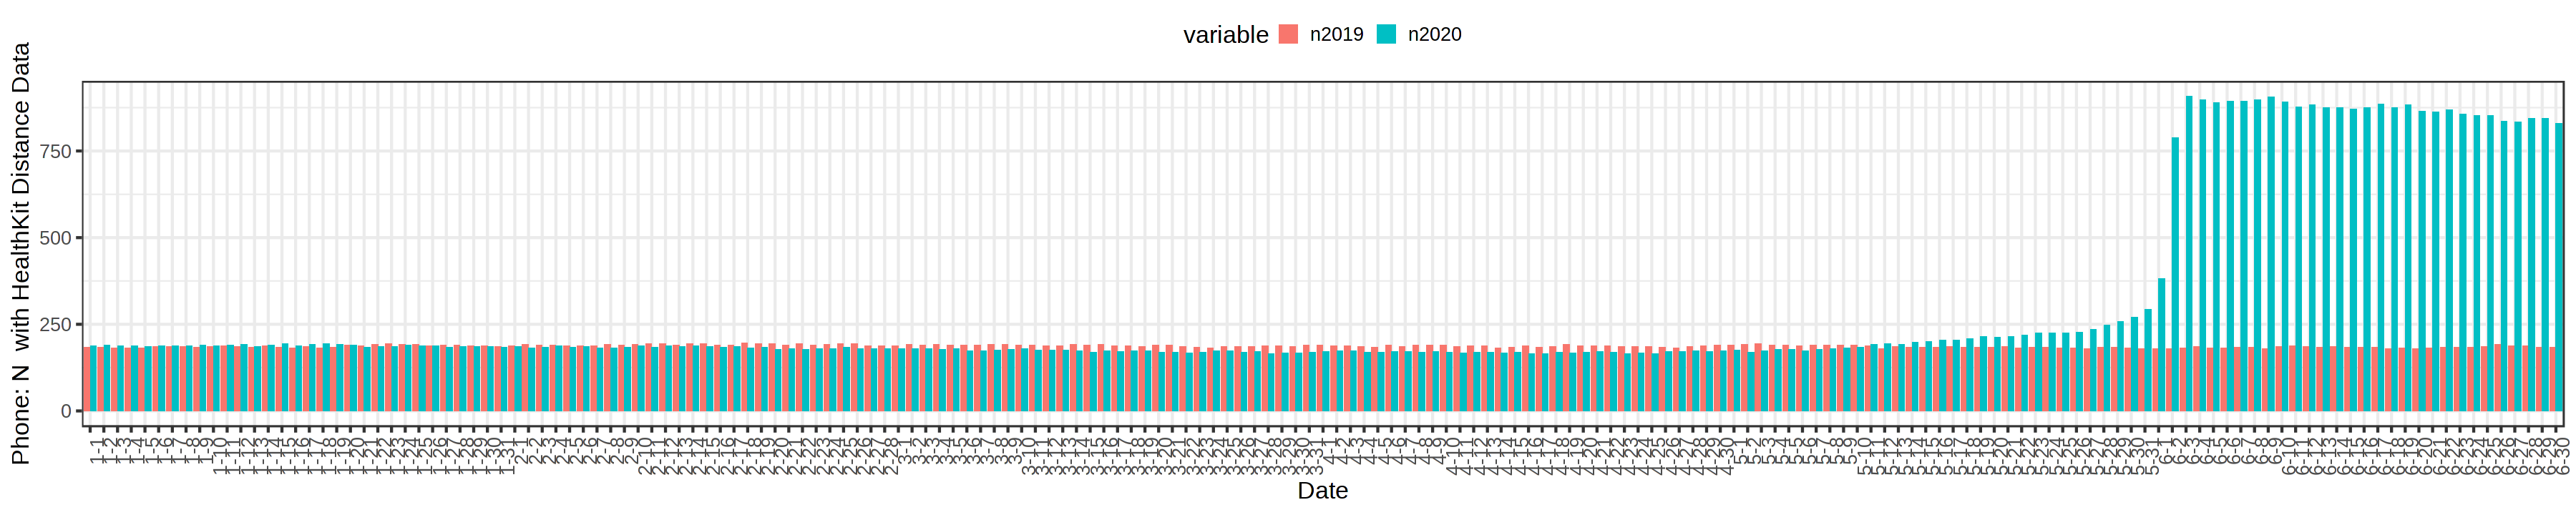

In [8]:
phone_subjects_distance_2019=phone_distance_2019 %>% group_by(Date) %>% summarize(n=n())
phone_subjects_distance_2020=phone_distance_2020 %>% group_by(Date) %>% summarize(n=n())
phone_subjects_distance_2020$Date=phone_subjects_distance_2020$Date-years(1)
phone_nmerged=merge(phone_subjects_distance_2019,phone_subjects_distance_2020,by='Date')
phone_nmerged$month=month(phone_nmerged$Date)
phone_nmerged$day=day(phone_nmerged$Date)

phone_nmerged$Date <- do.call(paste, c(phone_nmerged[c("month","day")], sep="-"))
colnames(phone_nmerged)=c("Date","n2019","n2020","month","day")
phone_nmerged$Date=factor(phone_nmerged$Date,levels=phone_nmerged$Date)
phone_nmerged$month=NULL
phone_nmerged$day=NULL


phone_nmelted=melt(phone_nmerged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(phone_nmelted,aes(x=Date,y=value,group=variable,fill=variable))+
geom_bar(stat='identity',position='dodge')+
xlab("Date")+
ylab("Phone: N  with HealthKit Distance Data")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
theme(legend.position="top")

## across subjects

Using Date as id variables



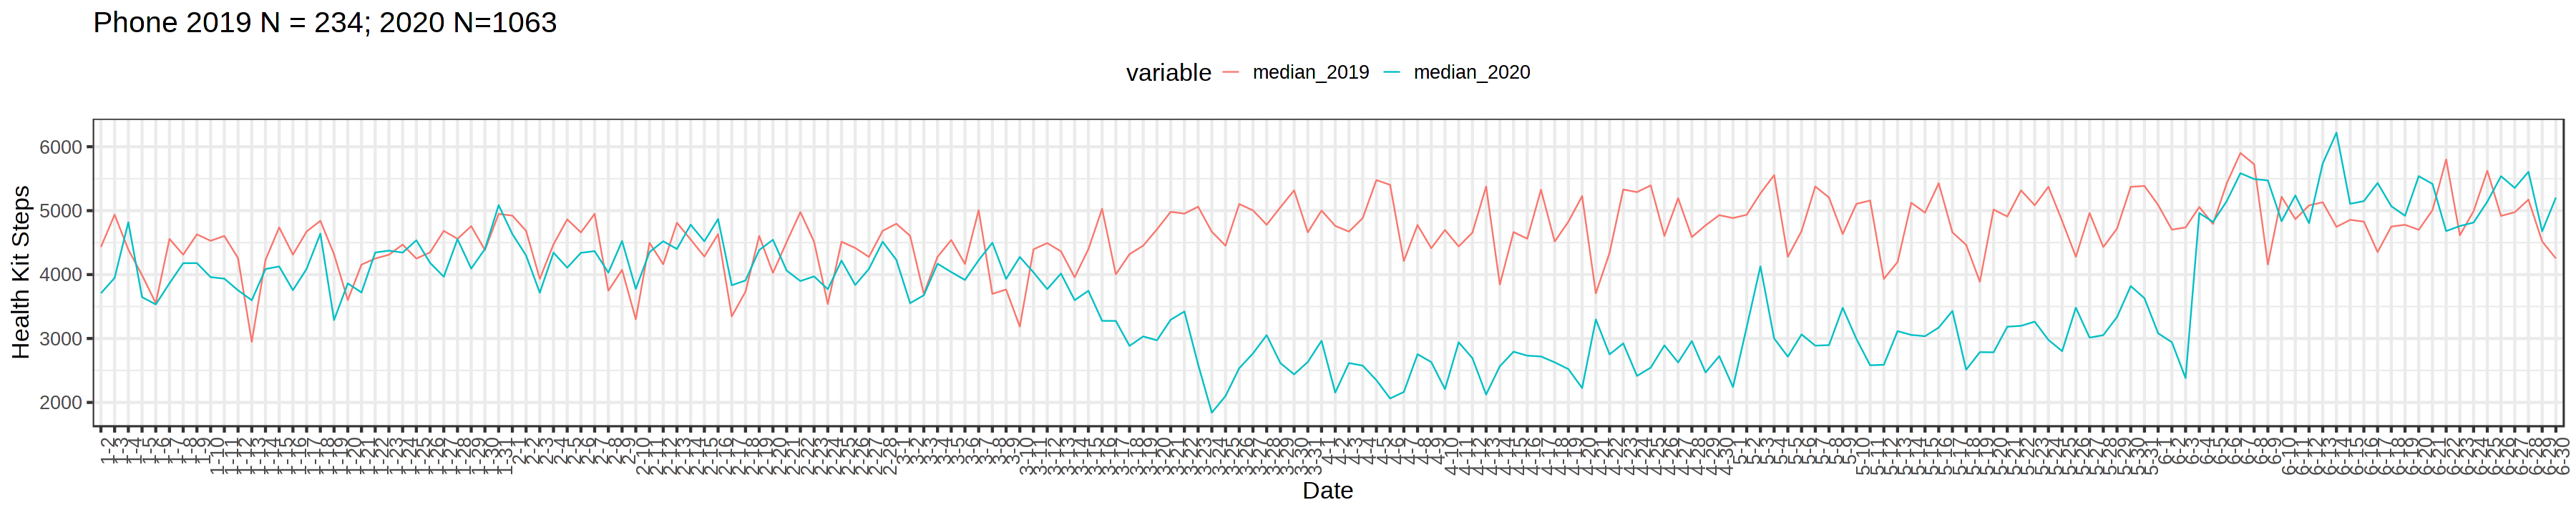

In [10]:
medians_2019=na.omit(phone_steps_2019 %>% group_by(Date) %>% summarize(median_steps=median(Value)))
medians_2020=na.omit(phone_steps_2020 %>% group_by(Date) %>% summarize(median_steps=median(Value)))

medians_2020$Date=medians_2020$Date-years(1)
medians_2020$Date=medians_2020$Date+days(1)

merged=merge(medians_2019,medians_2020,by='Date')
merged$month=month(merged$Date)
merged$day=day(merged$Date)

merged$Date <- do.call(paste, c(merged[c("month","day")], sep="-"))
colnames(merged)=c("Date","median_2019","median_2020","month","day")
merged$Date=factor(merged$Date,levels=merged$Date)

merged$month=NULL
merged$day=NULL

melted=melt(merged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(melted,aes(x=Date,y=value,group=variable,color=variable))+
geom_line()+
xlab("Date")+
ylab("Health Kit Steps")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ggtitle("Phone 2019 N = 234; 2020 N=1063")+
theme(legend.position="top")

Using Date as id variables



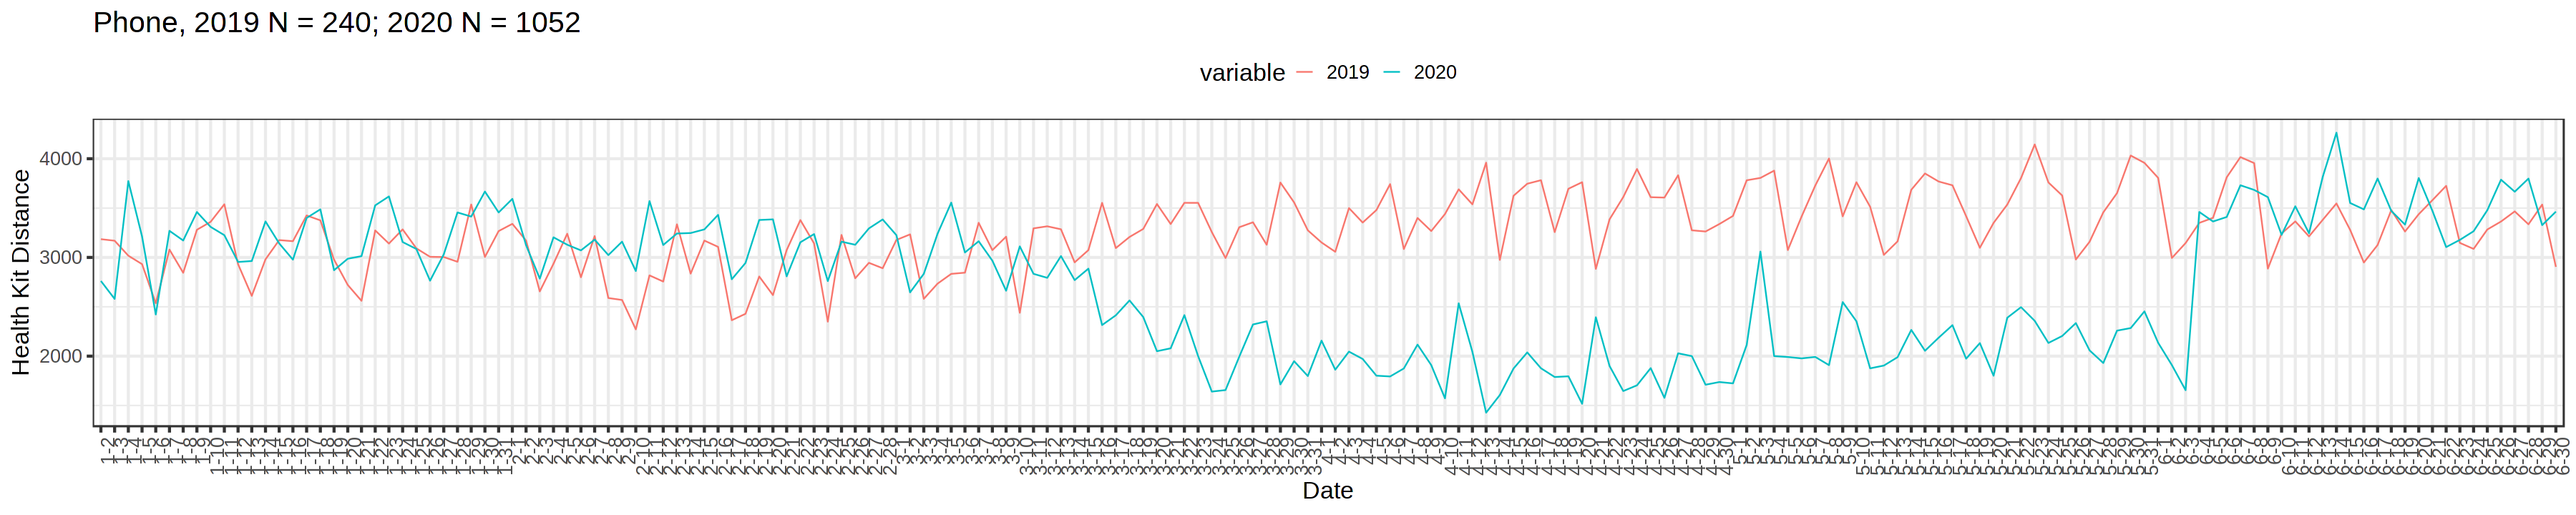

In [11]:
medians_2019=na.omit(phone_distance_2019 %>% group_by(Date) %>% summarize(median_distance=median(Value)))
medians_2020=na.omit(phone_distance_2020 %>% group_by(Date) %>% summarize(median_distance=median(Value)))
medians_2020$Date=medians_2020$Date-years(1)
medians_2020$Date=medians_2020$Date+days(1)

merged=merge(medians_2019,medians_2020,by='Date')
merged$month=month(merged$Date)
merged$day=day(merged$Date)
merged$Date <- do.call(paste, c(merged[c("month","day")], sep="-"))
colnames(merged)=c("Date","2019","2020","month","day")
merged$Date=factor(merged$Date,levels=merged$Date)
merged$month=NULL
merged$day=NULL
melted=melt(merged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(melted,aes(x=Date,y=value,group=variable,color=variable))+
geom_line()+
xlab("Date")+
ylab("Health Kit Distance")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ggtitle("Phone, 2019 N = 240; 2020 N = 1052")+
theme(legend.position="top")

## Watch 

In [12]:
watch_steps=read.table("parsed_HealthKitData.Steps.Watch.txt",header=TRUE,sep='\t')
watch_steps$Date=as.Date(watch_steps$Date)
length(unique(watch_steps$Subject))

[1] 997

In [13]:
watch_distance=read.table("parsed_HealthKitData.Distance.Watch.txt",header=TRUE,sep='\t')
watch_distance$Date=as.Date(watch_distance$Date)
length(unique(watch_distance$Subject))

[1] 1035

In [14]:
watch_steps_2019=watch_steps[(watch_steps$Date>=as.Date('2019-01-01')) & (watch_steps$Date<as.Date('2019-07-01')),]
watch_steps_2020=watch_steps[(watch_steps$Date>=as.Date('2020-01-01')) & (watch_steps$Date<as.Date('2020-07-01')),]
print(length(unique(watch_steps_2020$Subject)))


print(length(unique(watch_steps_2019$Subject)))
print(length(unique(watch_steps_2020$Subject)))





[1] 811
[1] 175
[1] 811


In [15]:
watch_distance_2019=watch_distance[(watch_distance$Date>=as.Date('2019-01-01')) & (watch_distance$Date<as.Date('2019-07-01')),]
watch_distance_2020=watch_distance[(watch_distance$Date>=as.Date('2020-01-01')) & (watch_distance$Date<as.Date('2020-07-01')),]

print(length(unique(watch_distance_2019$Subject)))
print(length(unique(watch_distance_2020$Subject)))



[1] 221
[1] 857


Using Date as id variables



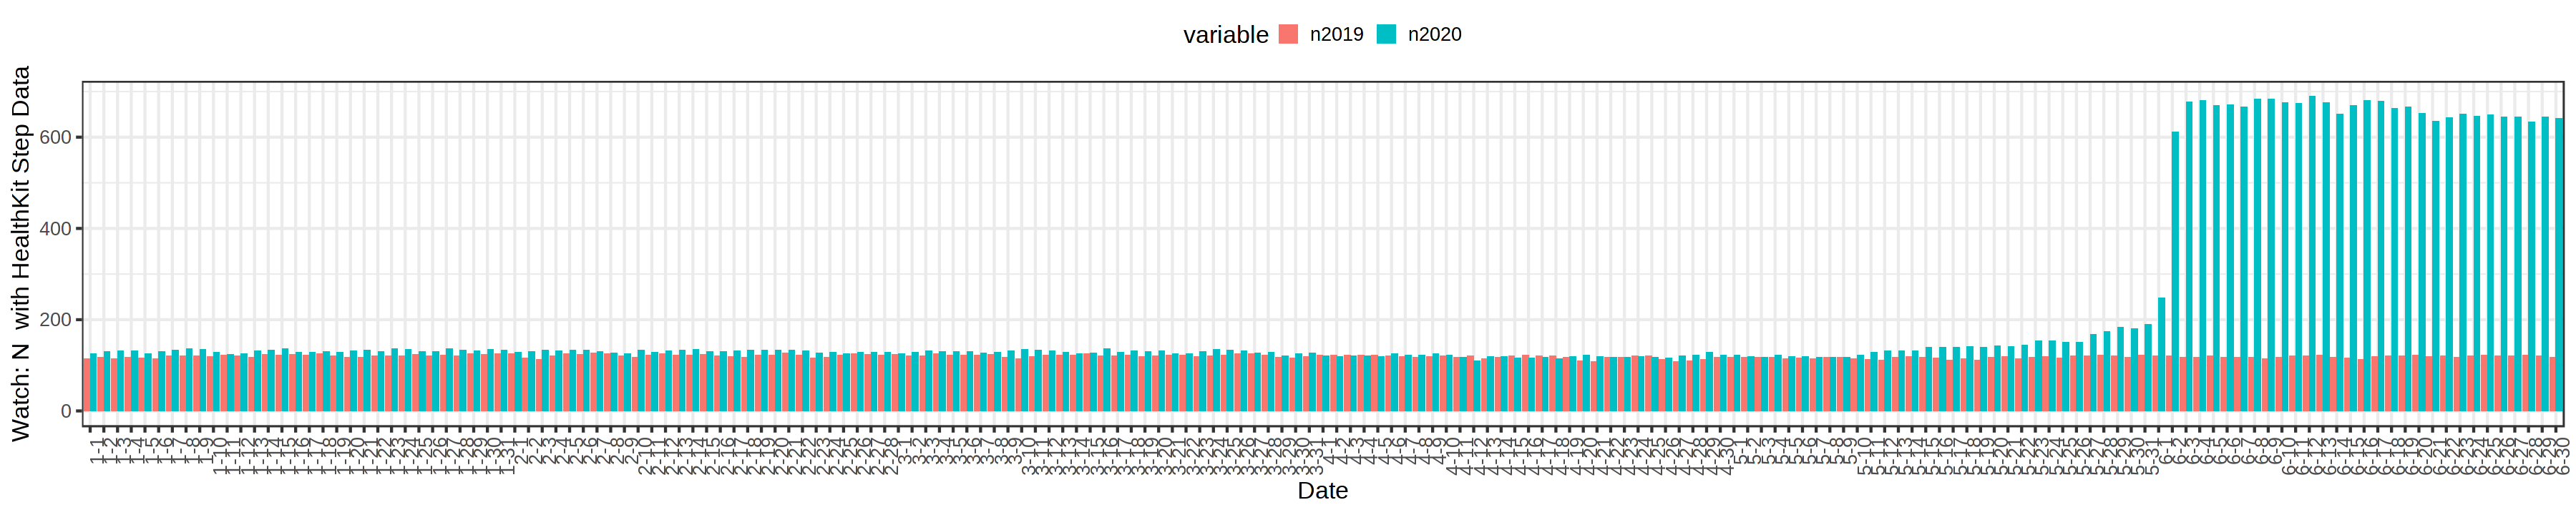

In [16]:
watch_subjects_steps_2019=watch_steps_2019 %>% group_by(Date) %>% summarize(n=n())
watch_subjects_steps_2020=watch_steps_2020 %>% group_by(Date) %>% summarize(n=n())
watch_subjects_steps_2020$Date=watch_subjects_steps_2020$Date-years(1)
watch_nmerged=merge(watch_subjects_steps_2019,watch_subjects_steps_2020,by='Date')
watch_nmerged$month=month(watch_nmerged$Date)
watch_nmerged$day=day(watch_nmerged$Date)

watch_nmerged$Date <- do.call(paste, c(watch_nmerged[c("month","day")], sep="-"))
colnames(watch_nmerged)=c("Date","n2019","n2020","month","day")
watch_nmerged$Date=factor(watch_nmerged$Date,levels=watch_nmerged$Date)
watch_nmerged$month=NULL
watch_nmerged$day=NULL


watch_nmelted=melt(watch_nmerged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(watch_nmelted,aes(x=Date,y=value,group=variable,fill=variable))+
geom_bar(stat='identity',position='dodge')+
xlab("Date")+
ylab("Watch: N  with HealthKit Step Data")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
theme(legend.position="top")

Using Date as id variables



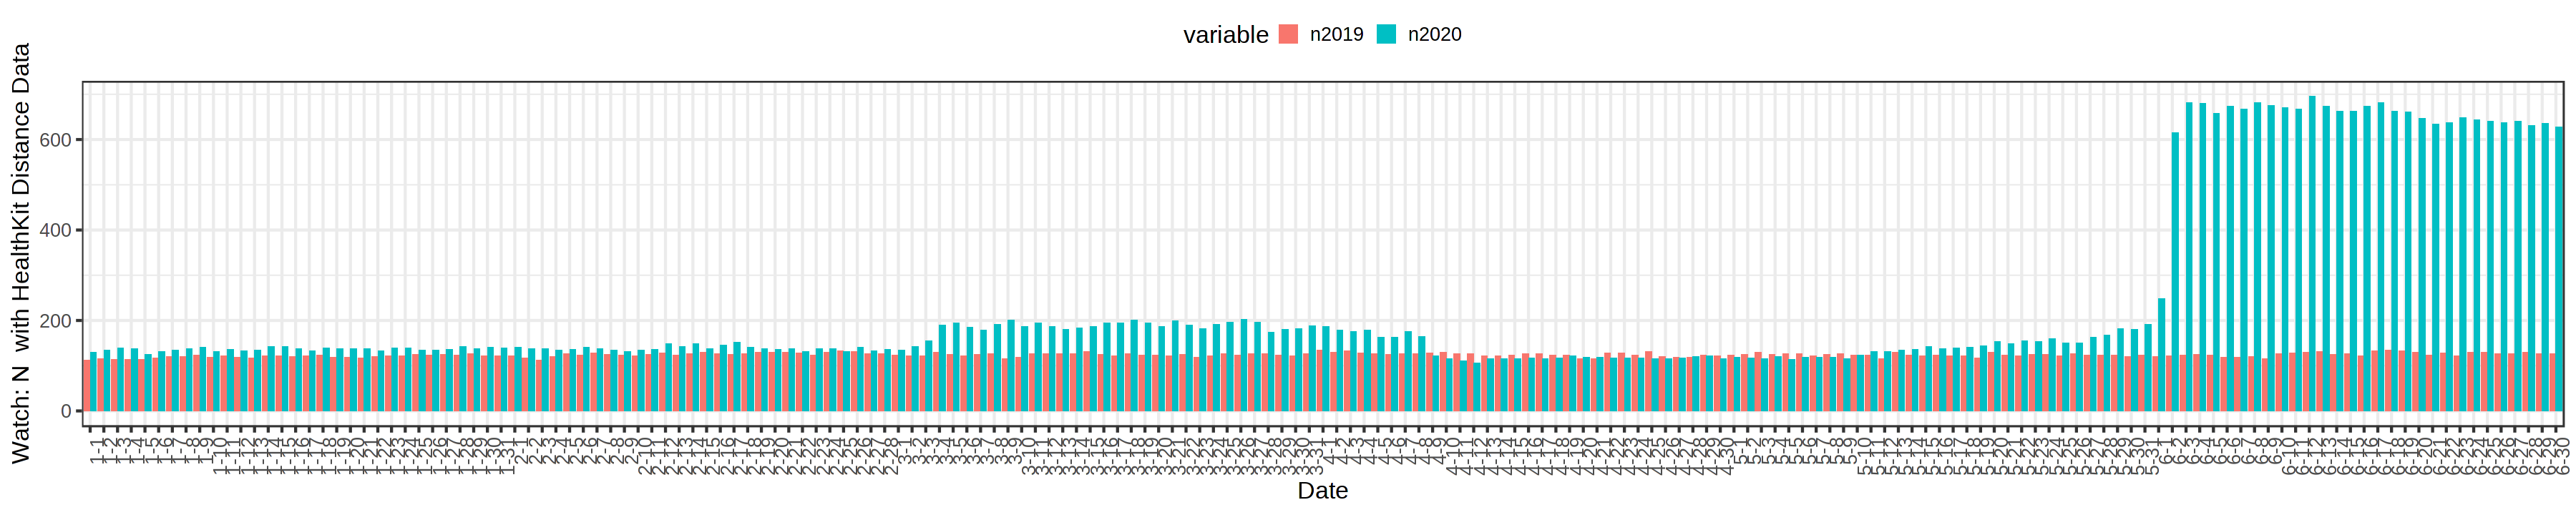

In [17]:
watch_subjects_distance_2019=watch_distance_2019 %>% group_by(Date) %>% summarize(n=n())
watch_subjects_distance_2020=watch_distance_2020 %>% group_by(Date) %>% summarize(n=n())
watch_subjects_distance_2020$Date=watch_subjects_distance_2020$Date-years(1)
watch_nmerged=merge(watch_subjects_distance_2019,watch_subjects_distance_2020,by='Date')
watch_nmerged$month=month(watch_nmerged$Date)
watch_nmerged$day=day(watch_nmerged$Date)

watch_nmerged$Date <- do.call(paste, c(watch_nmerged[c("month","day")], sep="-"))
colnames(watch_nmerged)=c("Date","n2019","n2020","month","day")
watch_nmerged$Date=factor(watch_nmerged$Date,levels=watch_nmerged$Date)
watch_nmerged$month=NULL
watch_nmerged$day=NULL


watch_nmelted=melt(watch_nmerged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(watch_nmelted,aes(x=Date,y=value,group=variable,fill=variable))+
geom_bar(stat='identity',position='dodge')+
xlab("Date")+
ylab("Watch: N  with HealthKit Distance Data")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
theme(legend.position="top")

Using Date as id variables



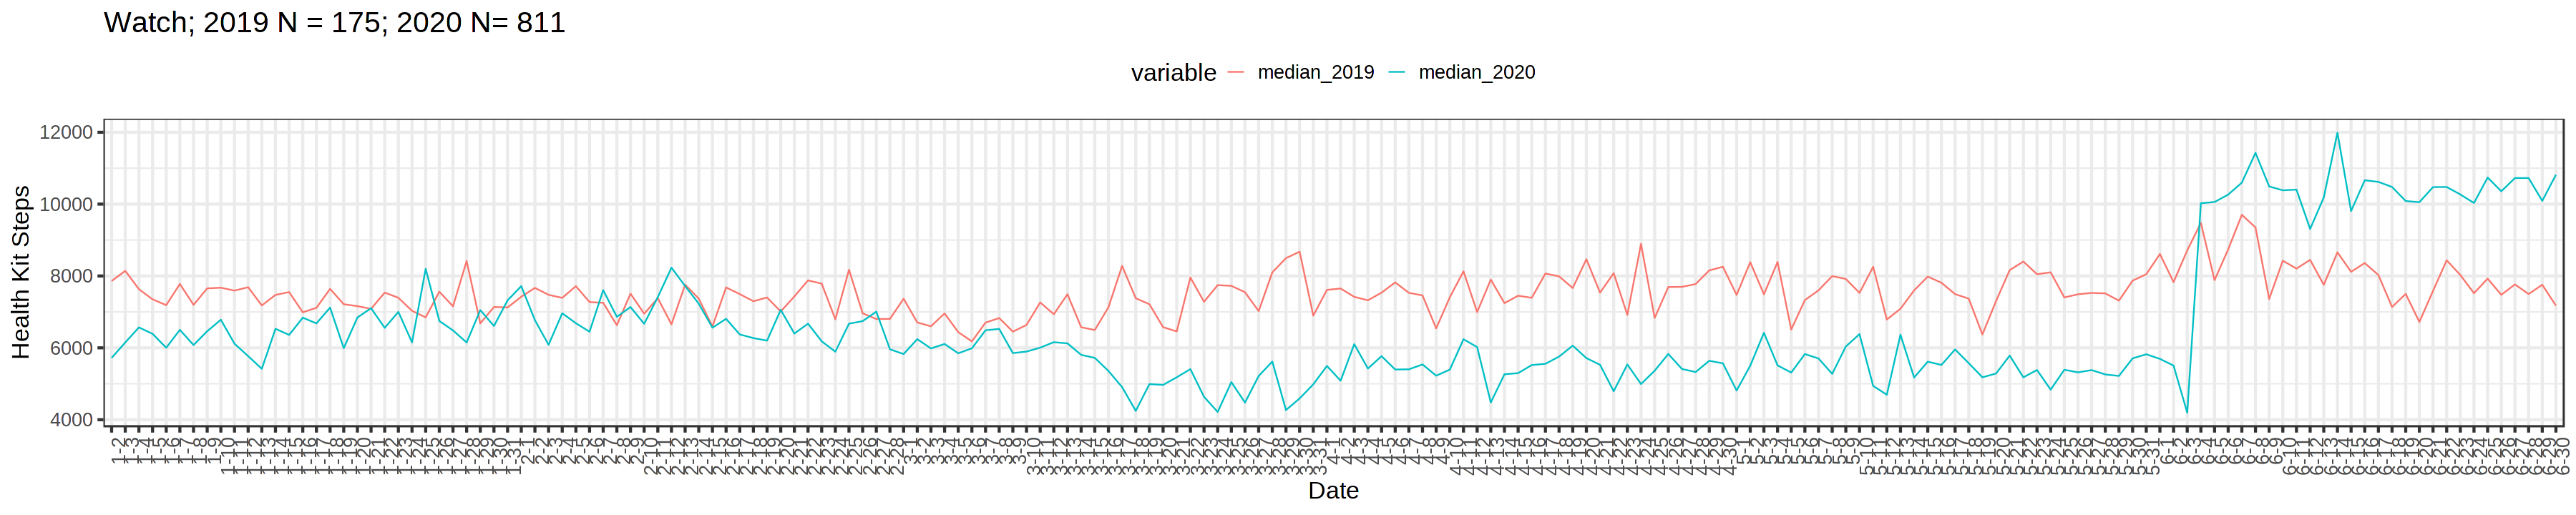

In [18]:
medians_2019=na.omit(watch_steps_2019 %>% group_by(Date) %>% summarize(median_steps=median(Value)))
medians_2020=na.omit(watch_steps_2020 %>% group_by(Date) %>% summarize(median_steps=median(Value)))

medians_2020$Date=medians_2020$Date-years(1)
medians_2020$Date=medians_2020$Date+days(1)
merged=merge(medians_2019,medians_2020,by='Date')
merged$month=month(merged$Date)
merged$day=day(merged$Date)

merged$Date <- do.call(paste, c(merged[c("month","day")], sep="-"))
colnames(merged)=c("Date","median_2019","median_2020","month","day")
merged$Date=factor(merged$Date,levels=merged$Date)

merged$month=NULL
merged$day=NULL

melted=melt(merged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(melted,aes(x=Date,y=value,group=variable,color=variable))+
geom_line()+
xlab("Date")+
ylab("Health Kit Steps")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ggtitle("Watch; 2019 N = 175; 2020 N= 811")+
theme(legend.position="top")

Using Date as id variables



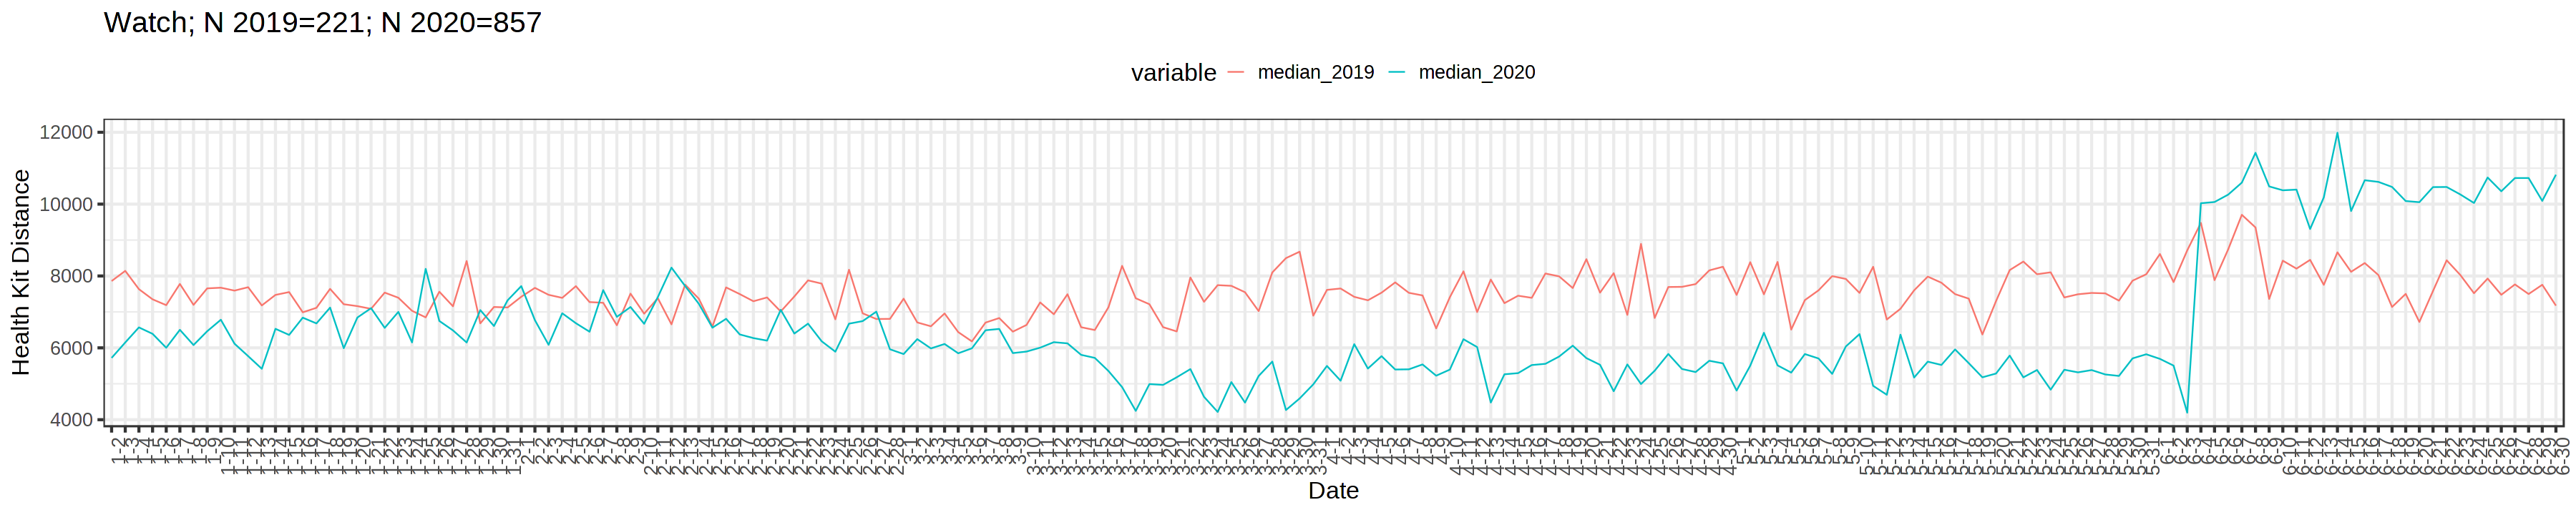

In [19]:
medians_2019=na.omit(watch_steps_2019 %>% group_by(Date) %>% summarize(median_steps=median(Value)))
medians_2020=na.omit(watch_steps_2020 %>% group_by(Date) %>% summarize(median_steps=median(Value)))

medians_2020$Date=medians_2020$Date-years(1)
medians_2020$Date=medians_2020$Date+days(1)

merged=merge(medians_2019,medians_2020,by='Date')
merged$month=month(merged$Date)
merged$day=day(merged$Date)

merged$Date <- do.call(paste, c(merged[c("month","day")], sep="-"))
colnames(merged)=c("Date","median_2019","median_2020","month","day")
merged$Date=factor(merged$Date,levels=merged$Date)

merged$month=NULL
merged$day=NULL

melted=melt(merged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(melted,aes(x=Date,y=value,group=variable,color=variable))+
geom_line()+
xlab("Date")+
ylab("Health Kit Distance")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ggtitle("Watch; N 2019=221; N 2020=857")+
theme(legend.position="top")

## Sleep 

In [20]:
sleep=read.table("parsed_HealthKitSleep.txt",header=TRUE,sep='\t')
#remove any non-possible values 
sleep=sleep[sleep$Value<57600,] #14 hours of sleep

In [21]:
sleep$Date=as.Date(sleep$Date)
length(unique(sleep$Subject))

[1] 593

In [22]:
sleep_2019=sleep[(sleep$Date>=as.Date('2019-01-01')) & (sleep$Date<as.Date('2019-07-01')),]
sleep_2020=sleep[(sleep$Date>=as.Date('2020-01-01')) & (sleep$Date<as.Date('2020-07-01')),]

print(length(unique(sleep_2019$Subject)))
print(length(unique(sleep_2020$Subject)))



[1] 187
[1] 535


In [23]:
asleep_2019=sleep_2019[sleep_2019$Metric=="HKCategoryValueSleepAnalysisAsleep",]
asleep_2020=sleep_2020[sleep_2019$Metric=="HKCategoryValueSleepAnalysisAsleep",]


inbed_2019=sleep_2019[sleep_2019$Metric=="HKCategoryValueSleepAnalysisInBed",]
inbed_2020=sleep_2020[sleep_2019$Metric=="HKCategoryValueSleepAnalysisInBed",]


In [24]:
sleep_sources_2019=as.data.frame(t(table(asleep_2019$Source)))
sleep_sources_2019=sleep_sources_2019[sleep_sources_2019$Freq>0,]
sleep_sources_2019$Var1=NULL
colnames(sleep_sources_2019)=c("Source","SubjectDays2019")
sleep_sources_2019=sleep_sources_2019[order(-sleep_sources_2019$SubjectDays),]
sleep_sources_2020=as.data.frame(t(table(asleep_2020$Source)))
sleep_sources_2020=sleep_sources_2020[sleep_sources_2020$Freq>0,]
sleep_sources_2020$Var1=NULL
colnames(sleep_sources_2020)=c("Source","SubjectDays2020")
sleep_sources_2020=sleep_sources_2020[order(-sleep_sources_2020$SubjectDays),]
sleep_sources_merged=plyr::join(sleep_sources_2019,sleep_sources_2020,by=c("Source"),type='full')

In [25]:
sleep_sources_merged

Source,SubjectDays2019,SubjectDays2020
<fct>,<int>,<int>
"(AutoSleep, com.tantsissa.AutoSleep)",6833,5873
"(SleepWatch, io.bodymatter.SleepWatch)",3254,3083
"(Sleep++, com.developingperspective.SleepPlusPlus)",2046,1152
"(Sleep Cycle, com.lexwarelabs.goodmorning)",1905,1399
"(Pillow, com.neybox.Pillow)",1084,1637
"(Connect, com.garmin.connect.mobile)",806,688
"(Health Mate, com.withings.wiScaleNG)",747,939
"(Motiv, com.mymotiv.motiv)",386,301
"(Oura, com.ouraring.oura)",318,843


Using Date as id variables



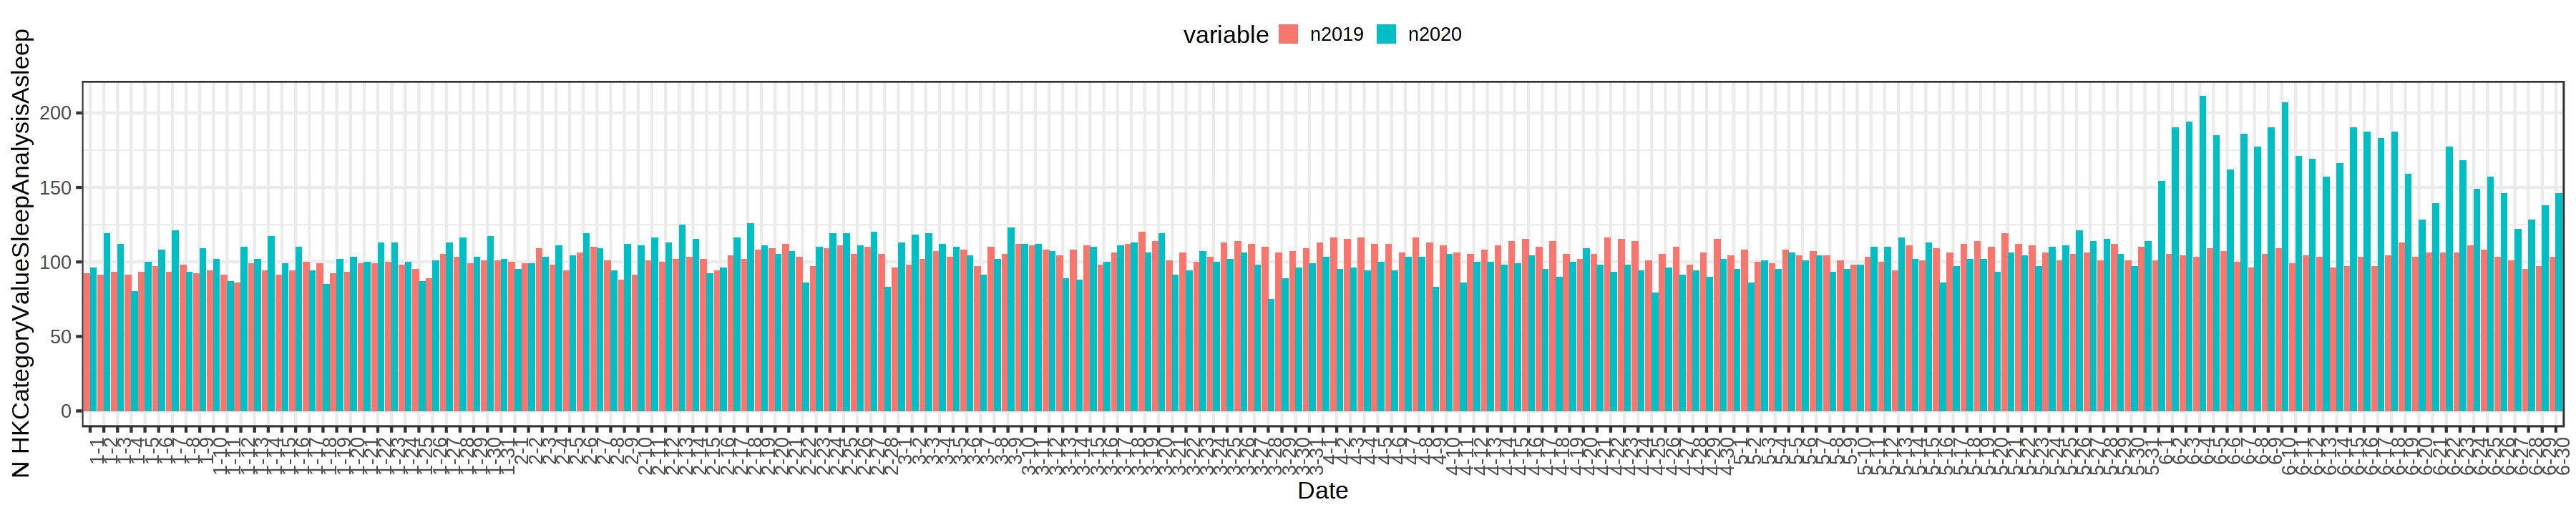

In [26]:
n_asleep_2019=asleep_2019 %>% group_by(Date) %>% summarize(n=n())
n_asleep_2020=asleep_2020 %>% group_by(Date) %>% summarize(n=n())
n_asleep_2020$Date=n_asleep_2020$Date-years(1)

asleep_nmerged=merge(n_asleep_2019,n_asleep_2020,by='Date')
asleep_nmerged$month=month(asleep_nmerged$Date)
asleep_nmerged$day=day(asleep_nmerged$Date)

asleep_nmerged$Date <- do.call(paste, c(asleep_nmerged[c("month","day")], sep="-"))
colnames(asleep_nmerged)=c("Date","n2019","n2020","month","day")
asleep_nmerged$Date=factor(asleep_nmerged$Date,levels=asleep_nmerged$Date)
asleep_nmerged$month=NULL
asleep_nmerged$day=NULL


asleep_nmelted=melt(asleep_nmerged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(asleep_nmelted,aes(x=Date,y=value,group=variable,fill=variable))+
geom_bar(stat='identity',position='dodge')+
xlab("Date")+
ylab("N HKCategoryValueSleepAnalysisAsleep")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
theme(legend.position="top")

Using Date as id variables



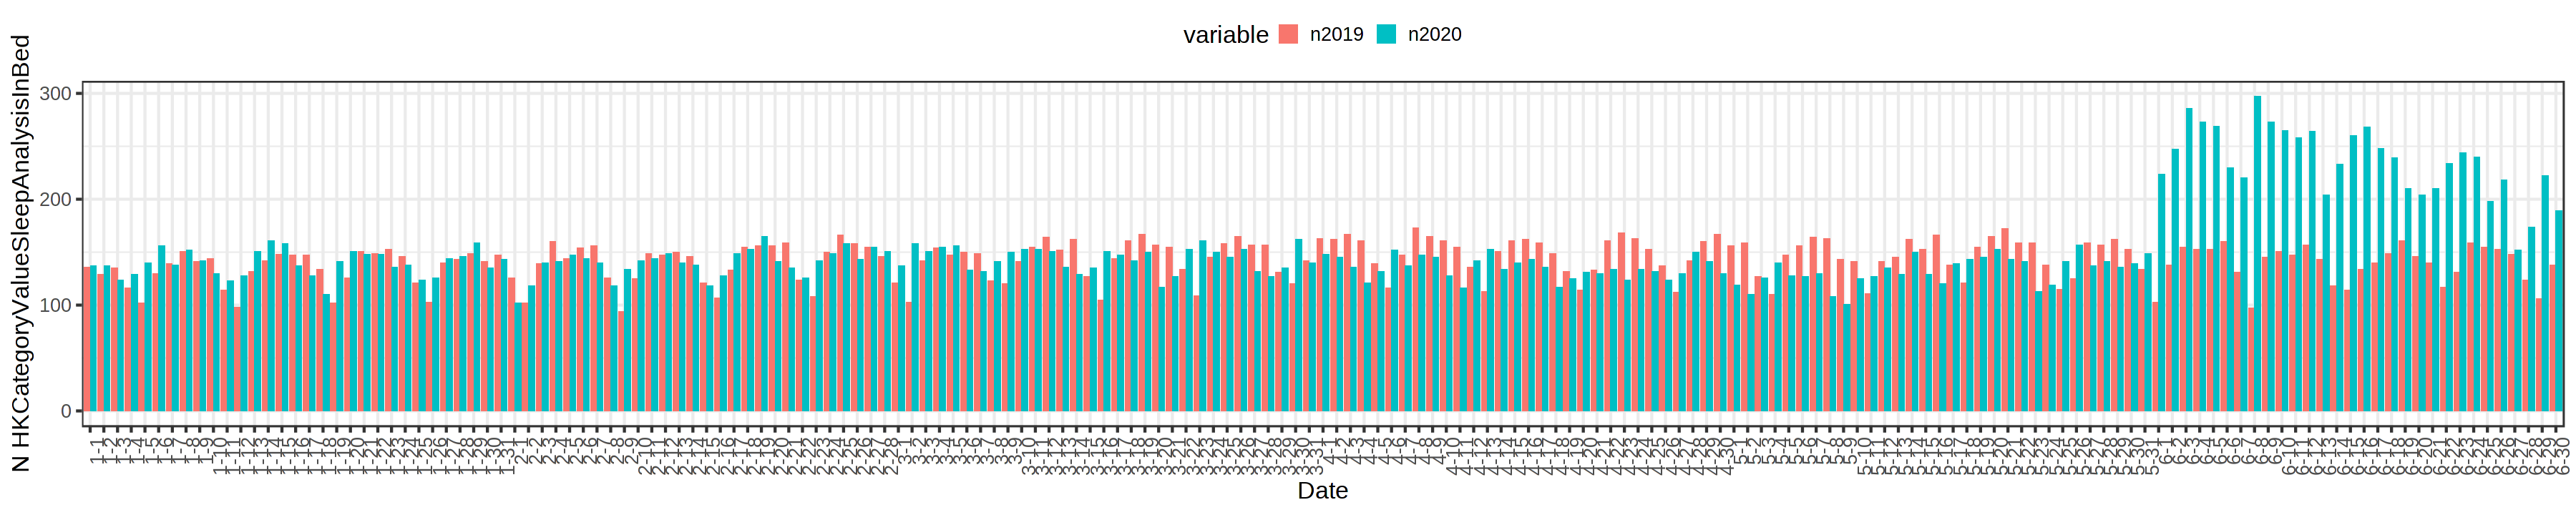

In [27]:
n_inbed_2019=inbed_2019 %>% group_by(Date) %>% summarize(n=n())
n_inbed_2020=inbed_2020 %>% group_by(Date) %>% summarize(n=n())
n_inbed_2020$Date=n_inbed_2020$Date-years(1)
inbed_nmerged=merge(n_inbed_2019,n_inbed_2020,by='Date')
inbed_nmerged$month=month(inbed_nmerged$Date)
inbed_nmerged$day=day(inbed_nmerged$Date)

inbed_nmerged$Date <- do.call(paste, c(inbed_nmerged[c("month","day")], sep="-"))
colnames(inbed_nmerged)=c("Date","n2019","n2020","month","day")
inbed_nmerged$Date=factor(inbed_nmerged$Date,levels=inbed_nmerged$Date)
inbed_nmerged$month=NULL
inbed_nmerged$day=NULL


inbed_nmelted=melt(inbed_nmerged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(inbed_nmelted,aes(x=Date,y=value,group=variable,fill=variable))+
geom_bar(stat='identity',position='dodge')+
xlab("Date")+
ylab("N HKCategoryValueSleepAnalysisInBed")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
theme(legend.position="top")

Using Date as id variables



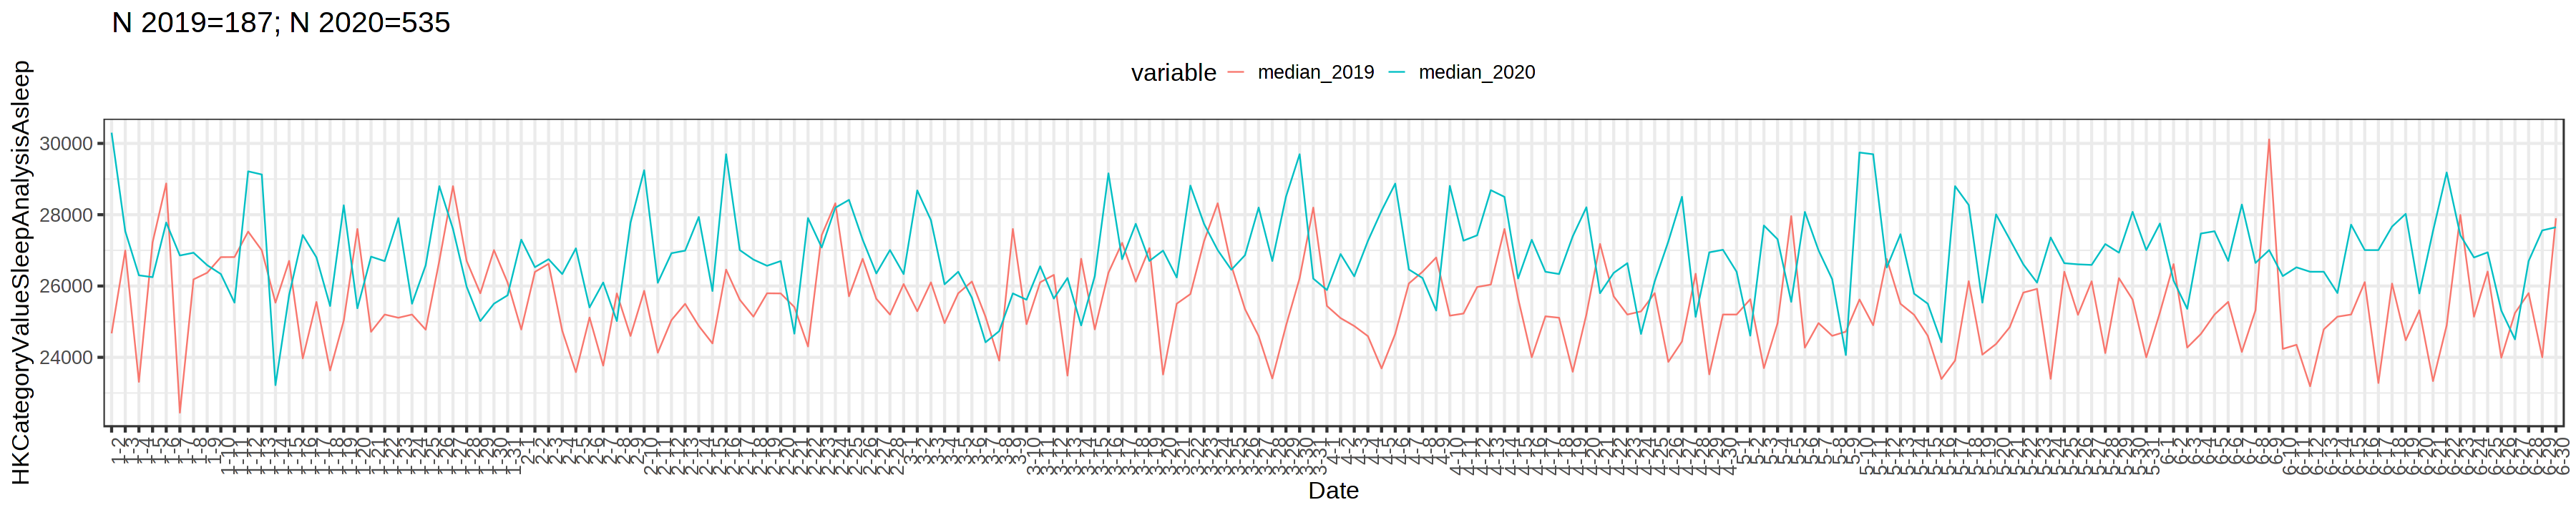

In [28]:
medians_2019=na.omit(asleep_2019 %>% group_by(Date) %>% summarize(median_steps=median(Value)))
medians_2020=na.omit(asleep_2020 %>% group_by(Date) %>% summarize(median_steps=median(Value)))

medians_2020$Date=medians_2020$Date-years(1)
#uncomment to match weekdays/weekends 
medians_2020$Date=medians_2020$Date+days(1)
merged=merge(medians_2019,medians_2020,by='Date')
merged$month=month(merged$Date)
merged$day=day(merged$Date)

merged$Date <- do.call(paste, c(merged[c("month","day")], sep="-"))
colnames(merged)=c("Date","median_2019","median_2020","month","day")
merged$Date=factor(merged$Date,levels=merged$Date)

merged$month=NULL
merged$day=NULL

melted=melt(merged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(melted,aes(x=Date,y=value,group=variable,color=variable))+
geom_line()+
xlab("Date")+
ylab("HKCategoryValueSleepAnalysisAsleep")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ggtitle(" N 2019=187; N 2020=535")+
theme(legend.position="top")

Using Date as id variables



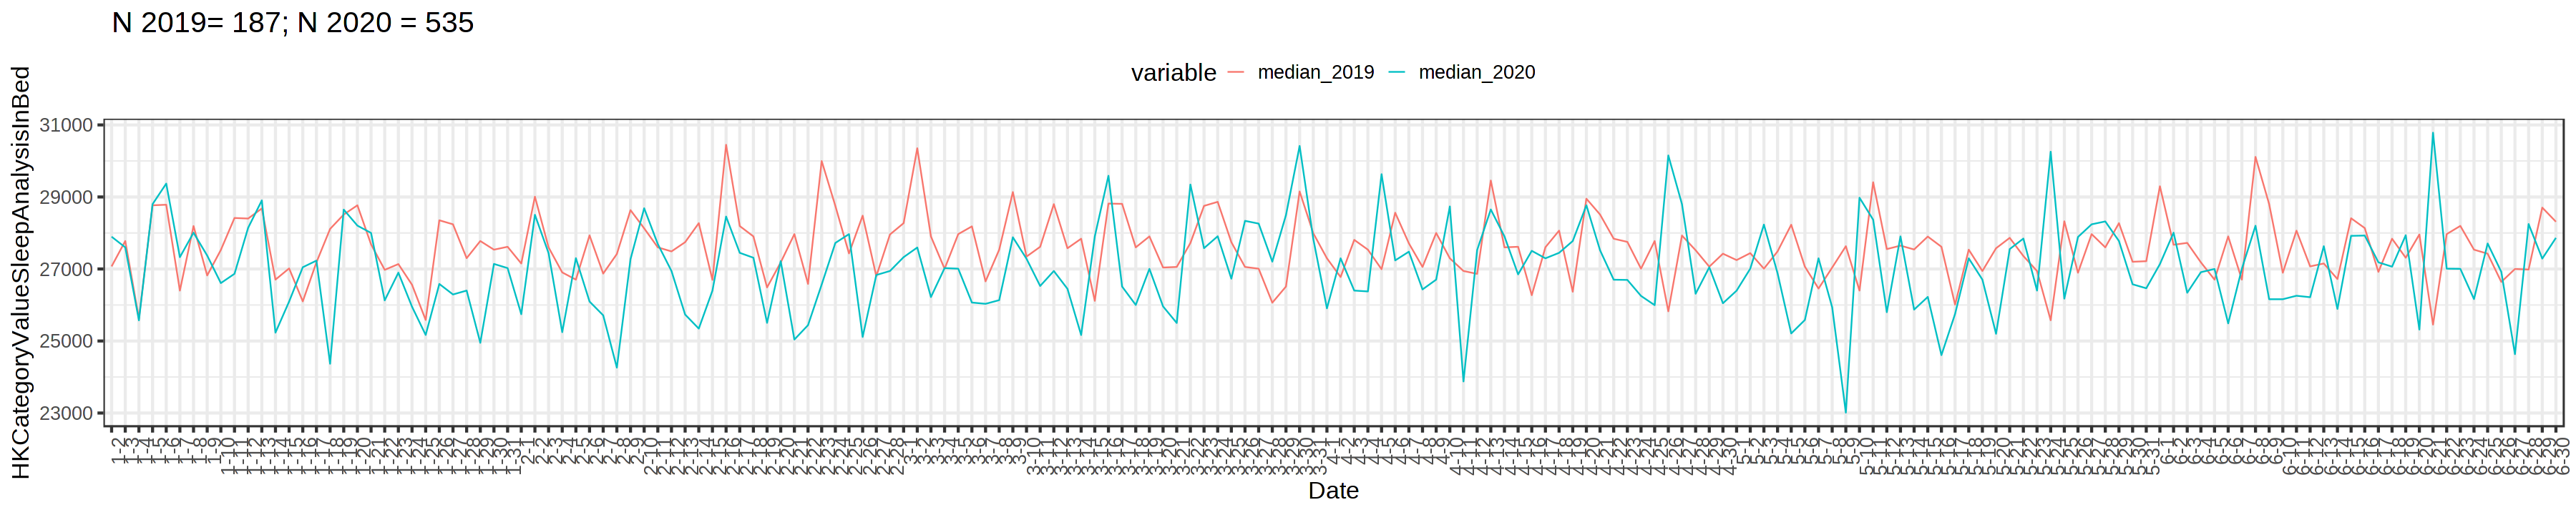

In [29]:
medians_2019=na.omit(inbed_2019 %>% group_by(Date) %>% summarize(median_steps=median(Value)))
medians_2020=na.omit(inbed_2020 %>% group_by(Date) %>% summarize(median_steps=median(Value)))

medians_2020$Date=medians_2020$Date-years(1)
#uncomment to match weekdays/weekends 
medians_2020$Date=medians_2020$Date+days(1)
merged=merge(medians_2019,medians_2020,by='Date')
merged$month=month(merged$Date)
merged$day=day(merged$Date)

merged$Date <- do.call(paste, c(merged[c("month","day")], sep="-"))
colnames(merged)=c("Date","median_2019","median_2020","month","day")
merged$Date=factor(merged$Date,levels=merged$Date)

merged$month=NULL
merged$day=NULL

melted=melt(merged,by="Date")
saved <- options(repr.plot.width=30, repr.plot.height=6)
ggplot(melted,aes(x=Date,y=value,group=variable,color=variable))+
geom_line()+
xlab("Date")+
ylab("HKCategoryValueSleepAnalysisInBed")+
theme_bw(20)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ggtitle(" N 2019= 187; N 2020 = 535")+
theme(legend.position="top")